In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# import os
# import pandas as pd
# import shutil

# # Input folder (read-only)
# input_dir = '/kaggle/input/roboflow-cattle-disease-dataset/train'

# # CSV file path
# csv_path = '/kaggle/input/roboflow-cattle-disease-dataset/train/_classes.csv'

# # Output folder (writable)
# output_dir = '/kaggle/working/train'

# # Load the CSV
# df = pd.read_csv(csv_path)
# df.columns = df.columns.str.strip()  # Clean column names

# # Get list of label columns (excluding 'filename')
# labels = df.columns.tolist()[1:]

# # Create subfolders for each label
# for label in labels:
#     os.makedirs(os.path.join(output_dir, label), exist_ok=True)

# # Copy images into subfolders
# for _, row in df.iterrows():
#     filename = row['filename']
#     src_path = os.path.join(input_dir, filename)

#     if os.path.isfile(src_path):
#         for label in labels:
#             if row[label] == 1:
#                 dest_path = os.path.join(output_dir, label, filename)
#                 shutil.copy(src_path, dest_path)
#     else:
#         print(f"Missing file: {filename}")


In [5]:
# import zipfile

# zip_path = "/kaggle/working/train.zip"
# folder_to_zip = "/kaggle/working/train"

# with zipfile.ZipFile(zip_path, 'w') as zipf:
#     for root, _, files in os.walk(folder_to_zip):
#         for file in files:
#             file_path = os.path.join(root, file)
#             arcname = os.path.relpath(file_path, folder_to_zip)
#             zipf.write(file_path, arcname)


In [1]:

# import os
# import pandas as pd
# import shutil

# # Input folder (read-only)
# input_dir = '/kaggle/input/roboflow-cattle-disease-dataset/test'

# # CSV file path
# csv_path = '/kaggle/input/roboflow-cattle-disease-dataset/test/_classes.csv'

# # Output folder (writable)
# output_dir = '/kaggle/working/test'

# # Load the CSV
# df = pd.read_csv(csv_path)
# df.columns = df.columns.str.strip()  # Clean column names

# # Get list of label columns (excluding 'filename')
# labels = df.columns.tolist()[1:]

# # Create subfolders for each label
# for label in labels:
#     os.makedirs(os.path.join(output_dir, label), exist_ok=True)

# # Copy images into subfolders
# for _, row in df.iterrows():
#     filename = row['filename']
#     src_path = os.path.join(input_dir, filename)

#     if os.path.isfile(src_path):
#         for label in labels:
#             if row[label] == 1:
#                 dest_path = os.path.join(output_dir, label, filename)
#                 shutil.copy(src_path, dest_path)
#     else:
#         print(f"Missing file: {filename}")


In [2]:
# import zipfile

# zip_path = "/kaggle/working/test.zip"
# folder_to_zip = "/kaggle/working/test"

# with zipfile.ZipFile(zip_path, 'w') as zipf:
#     for root, _, files in os.walk(folder_to_zip):
#         for file in files:
#             file_path = os.path.join(root, file)
#             arcname = os.path.relpath(file_path, folder_to_zip)
#             zipf.write(file_path, arcname)


In [3]:
# set seed for reproducibility
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

2025-07-16 11:33:33.163766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752665613.370948      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752665613.431409      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator # it is kind of pipeline set for training and testing dataset
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential

In [14]:
base_dir = "/kaggle/input/cattle-diseases-dataset/Cattle_Disease_Dataset"

In [15]:
# using image data generator
data_gen = ImageDataGenerator(rescale = 1.0/255,validation_split = 0.2 )# 20 percent is validation dataset

In [16]:
train_gen = data_gen.flow_from_directory(base_dir,target_size =(224,224),batch_size=64,subset='training',class_mode = 'categorical')
val_gen = data_gen.flow_from_directory(base_dir,target_size =(224,224),batch_size=64,subset='validation',class_mode = 'categorical')

Found 690 images belonging to 7 classes.
Found 169 images belonging to 7 classes.


In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the number of output classes
no_of_classes = 7

# Load the MobileNetV2 base model (without the top classification layers)
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')  # Use pretrained ImageNet weights

# Freeze the base model (optional, you can also fine-tune)
base_model.trainable = False

# Build the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(no_of_classes, activation='softmax')
])

# Show model summary
model.summary()





Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
# compile the model
batch_size = 32
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [19]:
# Training the Model
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=val_gen,
    validation_steps=val_gen.samples // batch_size  # Validation steps
)

Epoch 1/5


I0000 00:00:1752665900.317951     124 service.cc:148] XLA service 0x7a3900211080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752665900.318716     124 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752665900.318742     124 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752665901.296145     124 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3398 - loss: 2.2946 

I0000 00:00:1752665907.213464     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/21 ━━━━━━━━━━━━━━━━━━━━ 8s 831ms/step - accuracy: 0.4538 - loss: 1.5993

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 868ms/step - accuracy: 0.4834 - loss: 1.4079 - val_accuracy: 0.6509 - val_loss: 0.7148
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.6225 - loss: 0.8089 - val_accuracy: 0.6391 - val_loss: 0.5785
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.6400 - loss: 0.6325 - val_accuracy: 0.6509 - val_loss: 0.5449
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.6512 - loss: 0.5829 - val_accuracy: 0.6509 - val_loss: 0.5469
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.6637 - loss: 0.5481 - val_accuracy: 0.6509 - val_loss: 0.5257


In [20]:
# evaluate the model
loss,accuracy = model.evaluate(val_gen,steps=val_gen.samples // batch_size)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6468 - loss: 0.5169 
Loss: 0.5257353186607361
Accuracy: 0.6508875489234924


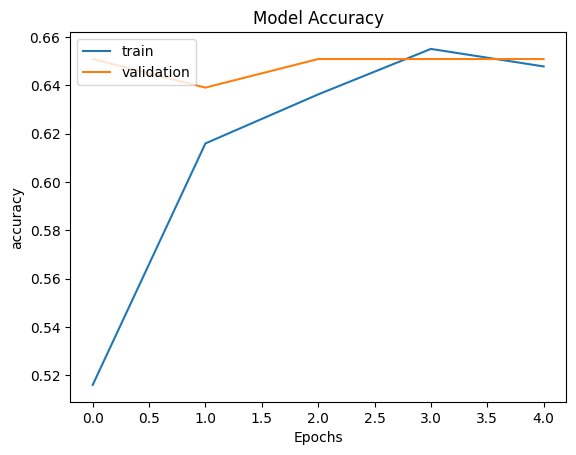

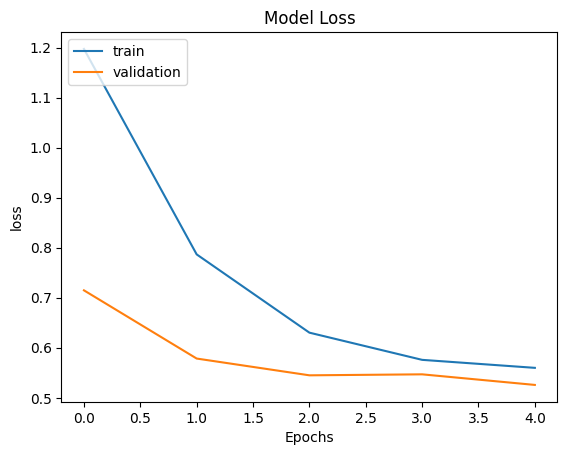

In [21]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(loc='upper left')
plt.show()
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(loc='upper left')
plt.show()

In [22]:
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [23]:
class_indices

{0: 'Bovine Respiratory Disease',
 1: 'Contagious',
 2: 'Dermatitis',
 3: 'Ecthym',
 4: 'healthy',
 5: 'lumpy',
 6: 'skin'}

In [25]:
# save model
model.save("Disease.h5")